# Sistema de recomendação de Filmes

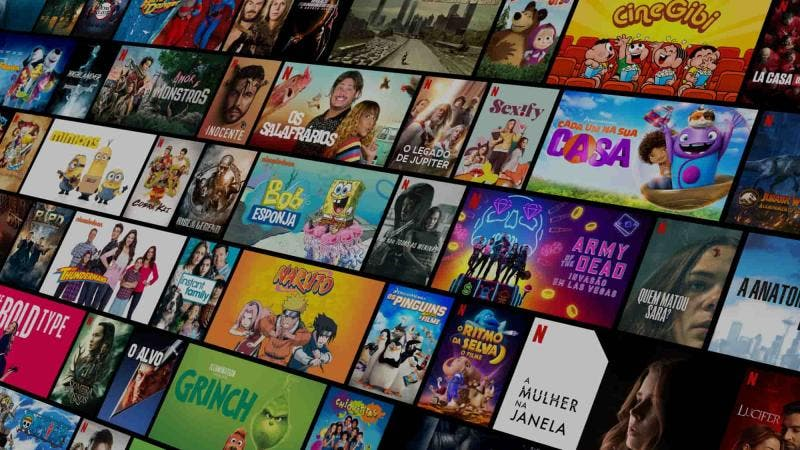

No mundo atual, a nossa relação com a vasta e diversificada gama de conteúdos audiovisuais foi transformada, em grande parte, pelas avançadas técnicas de recomendação. Ao fazermos uma busca por filmes e séries em plataformas como a Netflix, estamos entrando em contato com um dos aspectos mais fascinantes da tecnologia moderna: os sistemas de recomendação. A Netflix, por exemplo, emprega algoritmos de recomendação para sugerir títulos que se alinham de maneira precisa com nossos gostos pessoais. Cada seleção que fazemos, cada avaliação que damos e até mesmo o tempo que passamos assistindo são cuidadosamente analisados para criar um perfil detalhado de nossos interesses. O objetivo aqui nesse projeto  é criar um algoritmo de recomendação de filmes baseados em duas principais abordagens: *Filtragem colaborativa* ou '*Colaborative Filtering*, e *Filtragem Baseada em Conteúdo* ou *' Content-Based Filtering'*


**Filtragem Colaborativa**:
O filtro colaborativo se baseia nas interações e comportamentos passados dos usuários para fazer recomendações. Ele identifica padrões e relações entre os usuários e os itens que eles consumiram ou avaliaram. Se um usuário A e um usuário B têm gostos ou preferências semelhantes e ambos gostaram dos mesmos filmes no passado, o sistema de recomendação sugere itens que o usuário B gostou e que o usuário A ainda não conhece.

**Filtragem Baseada em Conteúdo**:
O filtro baseado em conteúdo considera as características ou atributos dos filmes para fazer recomendações. Ele analisa as descrições, tags ou características dos filmes e busca por similaridades entre eles. Se um usuário gostou de um filme de ação, por exemplo, o sistema de recomendação pode sugerir outros filmes com gênero e elementos semelhantes.

Nesse projeto foram utilizados alguns datasets com dados retirados do site [MovieLens](http://grouplens.org/datasets/movielens/), e que também pode ser encontrado no Kaggle clicando [aqui](http://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset). 



**IMPORTANDO BIBLIOTECAS**

In [111]:
import numpy as np 
import pandas as pd
import sklearn.metrics.pairwise as pw
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


**PRÉ-PROCESSAMENTO DOS DADOS**

In [112]:
ratings= pd.read_csv('/kaggle/input/movielens-dataset/ratings.csv')
filmes= pd.read_csv('/kaggle/input/movies/Filmes.csv')
filmes.head(20)


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action|Adventure|Thriller,1995


In [113]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [114]:
#unindo os dois datasets
df= filmes.merge(ratings,on='movieId')
df.drop('timestamp',axis=1,inplace=True)
df.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2,5.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8,5.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,14,4.0


# 1.Colaborative Filtering 

In [115]:
#criando a tabela com as notas dos usuários pra cada filme
tabela= pd.pivot_table(df,index='title',columns='userId',values='rating')
tabela.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
'Til There Was You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cada usuário deu nota para alguns filmes apenas, por isso a tabela ficou com muitos valores NaN

In [116]:
#Preenchendo os valores vazios com 0
tabela.fillna(0,inplace=True)
tabela.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**SIMILARIDADE POR COSSENO**

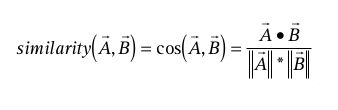

A similaridade por cosseno é uma maneira de medir a proximidade entre itens, nesse contexto, cada filme será tratado como um vetor em um espaço de várias dimensões, em que cada dimensão corresponde a uma avaliação feita por um usuário. Sendo assim, Por meio da aplicação da fórmula, a semelhança entre os vetores pode ser calculada, resultando em valores mais próximos de 1 para aqueles filmes que compartilham avaliações similares, e com isso podemos rankear os filmes mais parecidos com base em notas dos usuários. 

In [117]:

rec= pw.cosine_similarity(tabela)
rec=pd.DataFrame(rec,columns=tabela.index,index=tabela.index)
rec.head()

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...And Justice for All,10,...,Zoolander,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
title,,,,,,,,,,,,,,,,,,,,,
'71,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.342682,0.000000,...,0.100919,0.0,0.000000,0.000000,0.000000,0.000000,0.158272,0.0,0.098324,0.0
'Hellboy': The Seeds of Creation,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.147486,0.0
'Round Midnight,0.0,0.0,1.0,0.0,0.0,0.0,0.081094,0.000000,0.257012,0.680414,...,0.126148,0.0,0.000000,0.227429,0.141421,0.100219,0.221581,0.0,0.098324,1.0
'Til There Was You,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
"'burbs, The",0.0,0.0,0.0,0.0,1.0,0.0,0.031610,0.231897,0.100923,0.000000,...,0.116263,0.0,0.057358,0.000000,0.000000,0.212684,0.104192,0.0,0.161820,0.0


In [118]:
#cria a função de recomendação
def recomendacao(filme):
    cossine_df=pd.DataFrame(rec[filme].sort_values(ascending=False))
    cossine_df.columns=['Recomendacoes']
    return cossine_df.head(6)


In [119]:
recomendacao('Back to the Future')

,Recomendacoes
title,
Back to the Future,1.000000
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark),0.694080
Star Wars: Episode V - The Empire Strikes Back,0.677918
"Terminator, The",0.669783
Groundhog Day,0.665052
Indiana Jones and the Last Crusade,0.664701


In [120]:
recomendacao('Aliens')

,Recomendacoes
title,
Aliens,1.000000
Alien,0.827451
Star Wars: Episode V - The Empire Strikes Back,0.689251
Blade Runner,0.687992
Indiana Jones and the Last Crusade,0.681892
"Terminator, The",0.678051


In [121]:
recomendacao('Batman')

,Recomendacoes
title,
Batman,1.000000
Batman Forever,0.735802
"Fugitive, The",0.699292
True Lies,0.689348
Dances with Wolves,0.679899
Jurassic Park,0.654399


 # 2. Content-Based Filtering

In [122]:
filmes= pd.read_csv('/kaggle/input/movies/Filmes.csv')
dados=pd.read_csv('/kaggle/input/d/iancostermani/movielens/Dados.csv')
tags=pd.read_csv('/kaggle/input/d/iancostermani/movielens/Tags.csv')

In [123]:
dados.head()

,Name,Year,Stars,Score,Time,Votes,Total,Tags,Directors_Cast,Discription
0,Pulp Fiction,1994,8.9,94.0,154,"1,871,051",$107.93,\nCrime Drama,Quentin Tarantino John Travolta Uma Thurman Sa...,\nThe lives of two mob hitmen a boxer a gangst...
1,The Amazing Spider-Man 2,2014,6.6,53.0,142,"425,529",$202.85,\nAction Adventure Fantasy,Marc Webb Andrew Garfield Emma Stone Jamie Fox...,\nWhen New York is put under siege by Oscorp i...
2,The Shawshank Redemption,1994,9.3,80.0,142,"2,409,436",$28.34,\nDrama,Frank Darabont Tim Robbins Morgan Freeman Bob ...,\nTwo imprisoned men bond over a number of yea...
3,Star Wars: Episode IV - A New Hope,1977,8.6,90.0,121,"1,255,464",$322.74,\nAction Adventure Fantasy,George Lucas Mark Hamill Harrison Ford Carrie ...,\nLuke Skywalker joins forces with a Jedi Knig...
4,Back to the Future,1985,8.5,87.0,116,"1,087,878",$210.61,\nAdventure Comedy Sci-Fi,Robert Zemeckis Michael J. Fox Christopher Llo...,\nMarty McFly a 17-year-old high school studen...


In [124]:
tags.head()

,movieId,tag
0,1,"Owned,imdb top 250,Pixar,Pixar,time travel,chi..."
1,2,"Robin Williams,time travel,fantasy,based on ch..."
2,3,"funny,best friend,duringcreditsstinger,fishing..."
3,4,"based on novel or book,chick flick,divorce,int..."
4,5,"aging,baby,confidence,contraception,daughter,g..."


**Natural Language Processing (Processamento de Linguagem Natural)**

Os dados que vão ser utilizados como características dos filmes serão resultado de um tratamento desses dois datasets diferentes (tags e dados). E para aproveitar esses dados em string será necessário um trabalho de processamento de linguagem natural (NLP), que vai ser feito com ajuda do vetorizador - TfidfVectorizer, ele mede com que frequência uma palavra aparece (TF) e compensa essa frequência pela importância da palavra no conjunto total de filmes (IDF). Isso resulta em um valor que destaca as palavras-chaves únicas de cada filme. A similaridade entre filmes vai ser calculada com base nesses valores, permitindo recomendar filmes semelhantes com base nas palavras mais 'importantes'.

In [125]:
filmes['movieId'] = filmes['movieId'].astype(str)

In [126]:
#organizando os dados 
df2 = filmes.merge(dados, left_on='title', right_on='Name', how='left')
df2 = df2.merge(tags, left_on='movieId', right_on='movieId', how='left')
#apenas as features que serão aproveitadas no algoritmo 
df2['Infos'] = df2['genres'] + str(df2['Directors_Cast']) + str(df2['Discription']) + df2['tag']
df2.sample(20)

,movieId,title,genres,year,Name,Year,Stars,Score,Time,Votes,Total,Tags,Directors_Cast,Discription,tag,Infos
1147,1454,SubUrbia,Comedy|Drama,1997,SubUrbia,1996,6.8,62.0,121,"8,971",$0.73,\nComedy Drama,Richard Linklater Giovanni Ribisi Steve Zahn J...,\nA group of suburban teenagers try to support...,"independent film,minimalist,based on a play,ba...",Comedy|Drama0 John Lasseter Tom Hanks T...
9001,127132,Zipper,Drama|Thriller,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"woman director,nudity (topless),Louisiana,poli...",Drama|Thriller0 John Lasseter Tom Hanks...
5177,7822,Mogambo,Adventure|Drama|Romance,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"gorilla,human vs nature,kenya,safari,tension,l...",Adventure|Drama|Romance0 John Lasseter ...
1964,2517,Christine,Horror,1983,Christine,1983,6.7,57.0,110,"74,613",$21.20,\nHorror Thriller,John Carpenter Keith Gordon John Stockwell Ale...,\nA nerdish boy buys a strange car with an evi...,"cars,John Carpenter,stephen king,animate car,a...",Horror0 John Lasseter Tom Hanks Tim All...
7262,69278,Land of the Lost,Action|Adventure|Comedy|Sci-Fi,2009,Land of the Lost,2009,5.3,32.0,102,"67,623",$49.44,\nAction Adventure Comedy,Brad Silberling Will Ferrell Danny McBride Ann...,\nA space-time vortex sucks scientist Rick Mar...,"aliens,comedy,dinosaurs,parallel universe,time...",Action|Adventure|Comedy|Sci-Fi0 John La...
4285,5986,Fat City,Drama,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"alcoholism,boxer,boxing match,california,gritt...",Drama0 John Lasseter Tom Hanks Tim Alle...
5871,27803,"Sea Inside, The (Mar adentro)",Drama,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"biomedical ethics,death,disability,emotional,e...",Drama0 John Lasseter Tom Hanks Tim Alle...
4133,5664,Brown Sugar,Romance,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hip hop,Pam's list,reviewed,Pam's list",Romance0 John Lasseter Tom Hanks Tim Al...
4678,6746,Squirm,Horror|Romance,1976,Squirm,1976,4.8,NaN,92,"5,406",NaN,\nHorror,Jeff Lieberman Don Scardino Patricia Pearcy R....,NaN,"flooding,georgia,jealousy,light,love triangle,...",Horror|Romance0 John Lasseter Tom Hanks...
4589,6579,"One, Two, Three",Comedy,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Berlin,Cold War,communism,fast paced,germany,a...",Comedy0 John Lasseter Tom Hanks Tim All...


In [133]:
#aplicando a técnica de vetorização
vec = TfidfVectorizer()
tfidf = vec.fit_transform(df2['Infos'].astype(str))

In [134]:
#aplicando a similaridade por cossenos
sim = cosine_similarity(tfidf)
sim

array([[1.        , 0.08465854, 0.01312877, ..., 0.01361825, 0.02186222,
        0.01361825],
       [0.08465854, 1.        , 0.02747468, ..., 0.0599022 , 0.0949832 ,
        0.0599022 ],
       [0.01312877, 0.02747468, 1.        , ..., 0.19453706, 0.21472584,
        0.19453706],
       ...,
       [0.01361825, 0.0599022 , 0.19453706, ..., 1.        , 0.68030435,
        1.        ],
       [0.02186222, 0.0949832 , 0.21472584, ..., 0.68030435, 1.        ,
        0.68030435],
       [0.01361825, 0.0599022 , 0.19453706, ..., 1.        , 0.68030435,
        1.        ]])

In [129]:
sim_df2 = pd.DataFrame(sim, columns=df2['title'], index=df2['title'])
sim_df2.head()

title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Heat,Sabrina,Tom and Huck,Sudden Death,...,Gintama: The Movie,anohana: The Flower We Saw That Day - The Movie,Silver Spoon,Love Live! The School Idol Movie,Jon Stewart Has Left the Building,Black Butler: Book of the Atlantic,No Game No Life: Zero,Flint,Bungo Stray Dogs: Dead Apple,Andrew Dice Clay: Dice Rules
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.084659,0.013129,0.016002,0.033845,0.007786,0.007786,0.006416,0.052864,0.007285,...,0.099869,0.013618,0.013618,0.013618,0.013618,0.013618,0.013618,0.013618,0.021862,0.013618
Jumanji,0.084659,1.000000,0.027475,0.151885,0.103882,0.003845,0.003845,0.052921,0.087719,0.041849,...,0.076600,0.059902,0.059902,0.059902,0.059902,0.059902,0.059902,0.059902,0.094983,0.059902
Grumpier Old Men,0.013129,0.027475,1.000000,0.139910,0.196165,0.046368,0.046368,0.043952,0.131067,0.072365,...,0.179095,0.194537,0.194537,0.194537,0.194537,0.194537,0.194537,0.194537,0.214726,0.194537
Waiting to Exhale,0.016002,0.151885,0.139910,1.000000,0.278759,0.019550,0.019550,0.255034,0.314388,0.151062,...,0.373854,0.407665,0.407665,0.407665,0.407665,0.407665,0.407665,0.407665,0.448173,0.407665
Father of the Bride Part II,0.033845,0.103882,0.196165,0.278759,1.000000,0.011208,0.011208,0.081509,0.261189,0.144008,...,0.356444,0.372773,0.372773,0.372773,0.372773,0.372773,0.372773,0.372773,0.427902,0.372773


In [130]:
def rec(filme):
    final_df = pd.DataFrame(sim_df2[filme].sort_values(ascending=False))
    final_df.columns = ['Recomendações']
    return final_df.head(20)

In [131]:
rec('Finding Dory')

,Recomendações
title,
Finding Dory,1.000000
Finding Nemo,0.762913
Toy Story 2,0.757852
"Bug's Life, A",0.753002
Toy Story,0.747093
"Monsters, Inc.",0.702845
Toy Story 3,0.698079
Monsters University,0.697432
Up,0.640859


In [132]:
rec('Guardians of the Galaxy')

,Recomendações
title,
Guardians of the Galaxy,1.000000
Guardians of the Galaxy 2,0.651601
Ant-Man,0.456878
Star Wars: Episode IV - A New Hope,0.451995
Thor: The Dark World,0.431219
Avengers: Age of Ultron,0.406269
Captain America: The Winter Soldier,0.405353
Captain America: The First Avenger,0.400791
Fantastic Four,0.391455


In [137]:
rec('Jurassic Park')

,Recomendações
title,
Jurassic Park,1.000000
"Lost World: Jurassic Park, The",0.782860
"Land Before Time, The",0.472823
Jurassic Park III,0.453143
The Good Dinosaur,0.452093
E.T. the Extra-Terrestrial,0.441649
Jurassic World,0.411665
Dinosaur,0.361180
Close Encounters of the Third Kind,0.344274


**CONCLUSÃO**

Testando nosso algoritmo com filmes mais conhecidos é possível ver que as recomendações foram bastante satisfatórias, tanto no método de Filtragem Colaborativa quanto no método de Filtragem Baseada em Conteúdo. Claro que é um modelo bem simples e que pode ser amplamente melhorado como por exemplo, criando um sistema híbrido (que vai combinar os dois métodos de filtragem) ou com o uso de redes neurais.  